In [19]:
import pandas as pd
from unidecode import unidecode
import numpy as np
import scipy.io
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

PATH_UPV = "./DatosExperimento1/UPV"

# Leer el archivo Excel en un DataFrame de pandas
df = pd.read_excel(PATH_UPV+'/Exp1_Observadores_UPV.xlsx')
    
if not os.path.exists('Resultados_UPV'):
    os.makedirs('Resultados_UPV')

# Crear un diccionario vacío para almacenar los resultados
voluntarios_upv = {}

# Iterar sobre cada fila del DataFrame
for idx, row in df.iterrows():
    # Tratamiento de nombre y apellidos para evitar que una misma persona se trate como diferente:
    # Quito espacios, mayusculas, minuscula s, etc
    nombre = unidecode(row['Nombre'].lower())
    apellidos = unidecode(row['Apellidos'].split(" ")[0].lower())
    fichero = row['Fichero']
    # Crear la clave del diccionario usando el nombre y apellidos
    clave = f"{nombre}-{apellidos}".replace(" ", "")
    
    # Agregar el valor de la columna "Fichero" a la lista correspondiente en el diccionario
    if clave in voluntarios_upv:
        voluntarios_upv[clave].append(fichero)
    else:
        voluntarios_upv[clave] = [fichero]
voluntarios_upv

{'khleef-almutairi': ['ResultsJNDsNoiseFlatBG20211129T112353.mat',
  'ResultsJNDsNoiseFlatBG20211129T120005.mat'],
 'juan-giner': ['ResultsJNDsNoiseFlatBG20211129T133717.mat',
  'ResultsJNDsNoiseFlatBG20211129T140322.mat'],
 'sergio-camp': ['ResultsJNDsNoiseFlatBG20211129T163621.mat',
  'ResultsJNDsNoiseFlatBG20211129T171934.mat'],
 'antonio-hervas': ['ResultsJNDsNoiseFlatBG20211130T105700.mat',
  'ResultsJNDsNoiseFlatBG20220111T121738.mat'],
 'jessica-cordero': ['ResultsJNDsNoiseFlatBG20211201T114113.mat',
  'ResultsJNDsNoiseFlatBG20211210T120626.mat'],
 'josealberto-conejero': ['ResultsJNDsNoiseFlatBG20211202T140213.mat',
  'ResultsJNDsNoiseFlatBG20211202T142641.mat'],
 'mariajose-rodriguez': ['ResultsJNDsNoiseFlatBG20211203T102719.mat',
  'ResultsJNDsNoiseFlatBG20220124T090423.mat'],
 'cristina-martinez': ['ResultsJNDsNoiseFlatBG20211210T101730.mat',
  'ResultsJNDsNoiseFlatBG20211210T112932.mat'],
 'laura-mislata': ['ResultsJNDsNoiseFlatBG20211210T105955.mat',
  'ResultsJNDsNoiseFla

In [20]:
stats_upv = {}

for voluntario, ficheros in voluntarios_upv.items():   
    edad = None
    genero = None
    experto = None
    for fichero in ficheros:
        data_file = PATH_UPV+'/'+fichero
        data = scipy.io.loadmat(data_file)
        datos = np.array(data['datos'])[0]
        nombre = datos[0][0][0]
        apellidos = datos[0][1][0]
        
        if edad is None:
            edad = datos[0][2][0][0]
        elif edad != datos[0][2][0][0]:
            print(f"EDAD DISTINTA PARA MISMO USUARIO {edad} != {datos[0][2][0][0]}. Usuario {voluntario}")
            edad = max([edad, datos[0][2][0][0]])
            
        if genero is None:
            genero = datos[0][3][0][0]
        elif genero != datos[0][3][0][0]:
            print(f"GENERO DISTINTO PARA MISMO USUARIO {genero} != {datos[0][3][0][0]}. Usuario {voluntario}")
            
        if experto is None:
            experto = bool(datos[0][4][0][0])
        elif experto != bool(datos[0][4][0][0]):
            print(f"EXPERTO DISTINO PARA MISMO USUARIO {experto} != {bool(datos[0][4][0][0])}. Usuario {voluntario}")
            experto = True
    
    stats_upv[voluntario] = {}            
    stats_upv[voluntario]["nombre"] = nombre
    stats_upv[voluntario]["apellidos"] = apellidos
    stats_upv[voluntario]["edad"] = edad
    stats_upv[voluntario]["genero"] = genero
    stats_upv[voluntario]["experto"] = experto
        
stats_upv

EDAD DISTINTA PARA MISMO USUARIO 63 != 1. Usuario antonio-hervas
EDAD DISTINTA PARA MISMO USUARIO 56 != 57. Usuario mariajose-rodriguez
EXPERTO DISTINO PARA MISMO USUARIO True != False. Usuario mariajose-rodriguez
EDAD DISTINTA PARA MISMO USUARIO 33 != 34. Usuario marina-murillo


{'khleef-almutairi': {'nombre': 'Khleef',
  'apellidos': 'Almutairi',
  'edad': 31,
  'genero': 'H',
  'experto': True},
 'juan-giner': {'nombre': 'Juan',
  'apellidos': 'Giner',
  'edad': 60,
  'genero': 'H',
  'experto': False},
 'sergio-camp': {'nombre': 'Sergio',
  'apellidos': 'Camp',
  'edad': 49,
  'genero': 'H',
  'experto': False},
 'antonio-hervas': {'nombre': 'Antonio',
  'apellidos': 'Hervas',
  'edad': 63,
  'genero': 'H',
  'experto': False},
 'jessica-cordero': {'nombre': 'jessica',
  'apellidos': 'cordero',
  'edad': 35,
  'genero': 'M',
  'experto': False},
 'josealberto-conejero': {'nombre': 'JOSE ALBERTO',
  'apellidos': 'CONEJERO CASARES',
  'edad': 45,
  'genero': 'H',
  'experto': False},
 'mariajose-rodriguez': {'nombre': 'Maria JOse',
  'apellidos': 'Rodriguez Alvarez',
  'edad': 57,
  'genero': 'M',
  'experto': True},
 'cristina-martinez': {'nombre': 'Cristina',
  'apellidos': 'Martínez Vallier',
  'edad': 41,
  'genero': 'M',
  'experto': False},
 'laura-misl

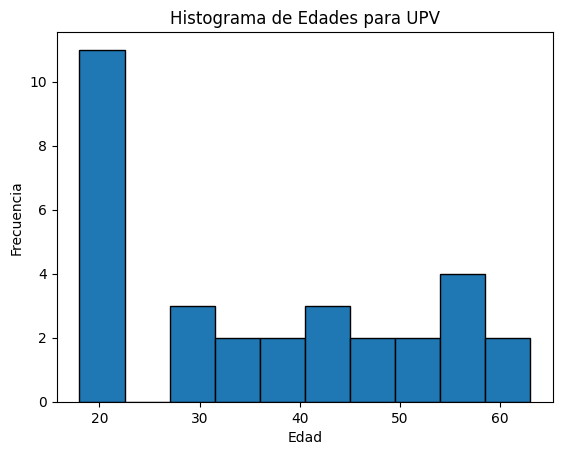

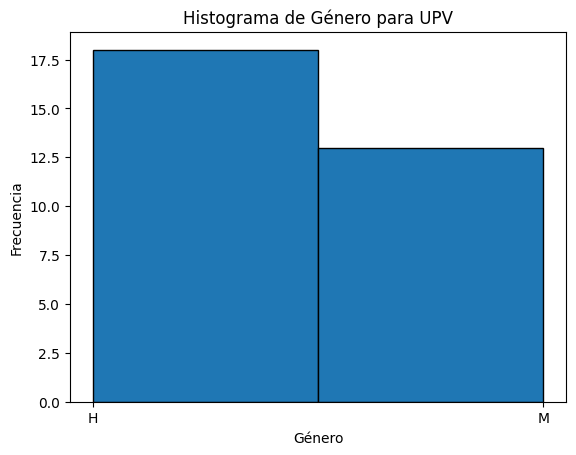

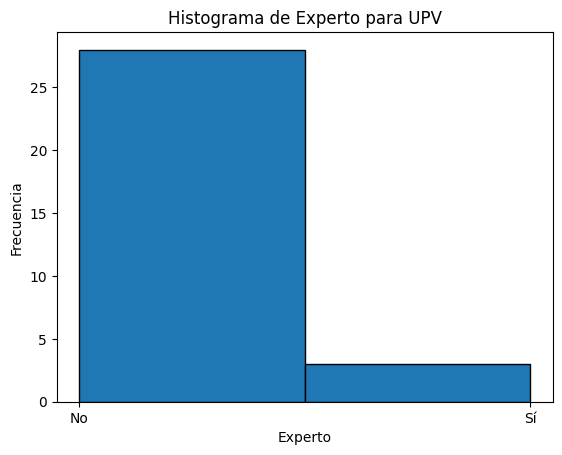

In [21]:
import matplotlib.pyplot as plt


edades = [datos['edad'] for datos in stats_upv.values()]
plt.hist(edades, bins=10, edgecolor='black')
plt.title('Histograma de Edades para UPV')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


generos = [datos['genero'] for datos in stats_upv.values()]
plt.hist(generos, bins=2, edgecolor='black')
plt.title('Histograma de Género para UPV')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


expertos = np.array([datos['experto'] for datos in stats_upv.values()], dtype=np.uint8)
plt.hist(expertos, bins=2, edgecolor='black')
plt.title('Histograma de Experto para UPV')
plt.xlabel('Experto')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


In [22]:
PATH_UGR = "./DatosExperimento1/UGR"

# Leer el archivo Excel en un DataFrame de pandas
df_ugr = pd.read_excel(PATH_UGR+'/Exp1_Observadores_UGR.xlsx')
    
if not os.path.exists('Resultados_UGR'):
    os.makedirs('Resultados_UGR')

# Crear un diccionario vacío para almacenar los resultados
voluntarios_ugr = {}

# Iterar sobre cada fila del DataFrame
for idx, row in df_ugr.iterrows():
    # Tratamiento de nombre y apellidos para evitar que una misma persona se trate como diferente:
    # Quito espacios, mayusculas, minuscula s, etc
    nombre = unidecode(row['Nombre'].lower())
    apellidos = unidecode(row['Apellidos'].split(" ")[0].lower())
    fichero = row['Fichero']
    # Crear la clave del diccionario usando el nombre y apellidos
    clave = f"{nombre}-{apellidos}".replace(" ", "")
    
    # Agregar el valor de la columna "Fichero" a la lista correspondiente en el diccionario
    if clave in voluntarios_ugr:
        voluntarios_ugr[clave].append(fichero)
    else:
        voluntarios_ugr[clave] = [fichero]
voluntarios_ugr

{'marcos-algaba': ['ResultsJNDsNoiseFlatBG20220401T131441.mat'],
 'victor-calleja': ['ResultsJNDsNoiseFlatBG20220317T113653.mat',
  'ResultsJNDsNoiseFlatBG20220407T113228.mat'],
 'miriam-casares': ['ResultsJNDsNoiseFlatBG20220201T134054.mat',
  'ResultsJNDsNoiseFlatBG20220202T124958.mat'],
 'josejuan-castro': ['ResultsJNDsNoiseFlatBG20220427T114635.mat',
  'ResultsJNDsNoiseFlatBG20220408T103353.mat'],
 'adela-collado': ['ResultsJNDsNoiseFlatBG20220401T121203.mat',
  'ResultsJNDsNoiseFlatBG20220323T132705.mat'],
 'maximilian-czech': ['ResultsJNDsNoiseFlatBG20220303T125835.mat',
  'ResultsJNDsNoiseFlatBG20220314T113216.mat'],
 'austin-english': ['ResultsJNDsNoiseFlatBG20220318T133520.mat'],
 'miguel-escano': ['ResultsJNDsNoiseFlatBG20220411T193944.mat',
  'ResultsJNDsNoiseFlatBG20220420T172846.mat'],
 'cristina-espinar': ['ResultsJNDsNoiseFlatBG20220223T112641.mat',
  'ResultsJNDsNoiseFlatBG20220223T161544.mat'],
 'beatriz-esteban': ['ResultsJNDsNoiseFlatBG20220209T132743.mat',
  'Result

In [23]:
stats_ugr = {}

for voluntario, ficheros in voluntarios_ugr.items():
    edad = None
    genero = None
    experto = None
    for fichero in ficheros:
        data_file = PATH_UGR+'/'+fichero
        data = scipy.io.loadmat(data_file)
        datos = np.array(data['datos'])[0]
        nombre = datos[0][0][0]
        apellidos = datos[0][1][0]
        
        if edad is None:
            edad = datos[0][2][0][0]
        elif edad != datos[0][2][0][0]:
            print(f"EDAD DISTINTA PARA MISMO USUARIO {edad} != {datos[0][2][0][0]}. Usuario {voluntario}")
            edad = max([edad, datos[0][2][0][0]])
            
        if genero is None:
            genero = datos[0][3][0][0]
        elif genero != datos[0][3][0][0]:
            print(f"GENERO DISTINTO PARA MISMO USUARIO {genero} != {datos[0][3][0][0]}. Usuario {voluntario}")
            
        if experto is None:
            experto = bool(datos[0][4][0][0])
        elif experto != bool(datos[0][4][0][0]):
            print(f"EXPERTO DISTINO PARA MISMO USUARIO {experto} != {bool(datos[0][4][0][0])}. Usuario {voluntario}")
            experto = True
    
    stats_ugr[voluntario] = {}            
    stats_ugr[voluntario]["nombre"] = nombre
    stats_ugr[voluntario]["apellidos"] = apellidos
    stats_ugr[voluntario]["edad"] = edad
    stats_ugr[voluntario]["genero"] = genero
    stats_ugr[voluntario]["experto"] = experto
        
stats_ugr

EDAD DISTINTA PARA MISMO USUARIO 42 != 43. Usuario javier-galindo
EDAD DISTINTA PARA MISMO USUARIO 18 != 19. Usuario javier-gutierrez
EDAD DISTINTA PARA MISMO USUARIO 22 != 1. Usuario maria-jimenez
EXPERTO DISTINO PARA MISMO USUARIO True != False. Usuario ruben-molina
EDAD DISTINTA PARA MISMO USUARIO 50 != 49. Usuario eva-valero


{'marcos-algaba': {'nombre': 'marcos',
  'apellidos': 'algaba mesa',
  'edad': 23,
  'genero': 'H',
  'experto': False},
 'victor-calleja': {'nombre': 'Víctor',
  'apellidos': 'Calleja Rodríguez',
  'edad': 24,
  'genero': 'H',
  'experto': False},
 'miriam-casares': {'nombre': 'Miriam',
  'apellidos': 'Casares López',
  'edad': 29,
  'genero': 'M',
  'experto': False},
 'josejuan-castro': {'nombre': 'José Juan',
  'apellidos': 'Castro Torres',
  'edad': 43,
  'genero': 'H',
  'experto': True},
 'adela-collado': {'nombre': 'Adela ',
  'apellidos': 'Collado Rodríguez',
  'edad': 21,
  'genero': 'M',
  'experto': False},
 'maximilian-czech': {'nombre': 'Maximilian',
  'apellidos': 'Czech',
  'edad': 29,
  'genero': 'H',
  'experto': True},
 'austin-english': {'nombre': 'Austin',
  'apellidos': 'English',
  'edad': 27,
  'genero': 'H',
  'experto': True},
 'miguel-escano': {'nombre': 'Miguel',
  'apellidos': 'Escaño Huertas',
  'edad': 19,
  'genero': 'H',
  'experto': False},
 'cristina-

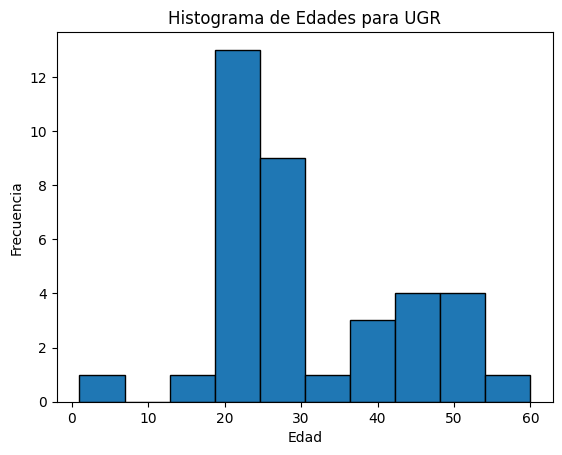

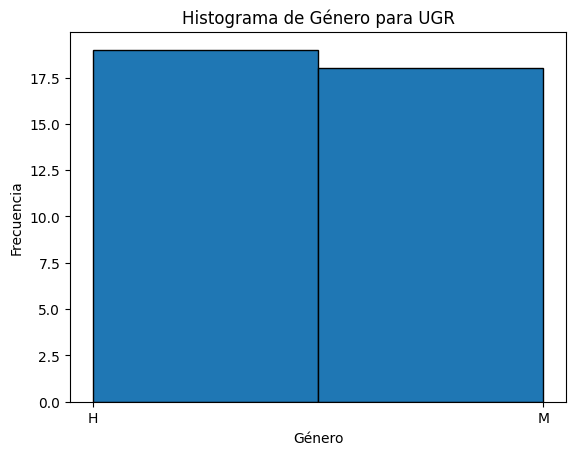

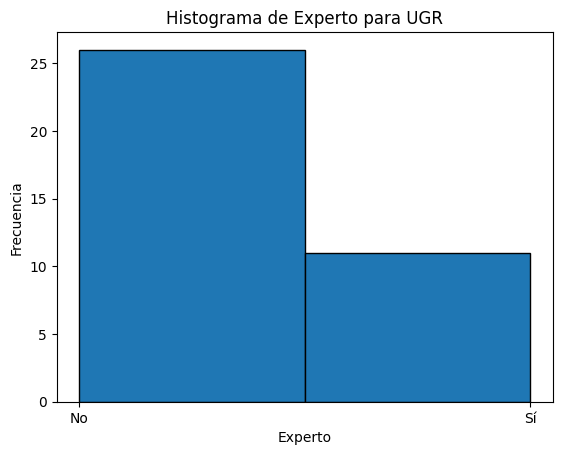

In [24]:
edades = [datos['edad'] for datos in stats_ugr.values()]
plt.hist(edades, bins=10, edgecolor='black')
plt.title('Histograma de Edades para UGR')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


generos = [datos['genero'] for datos in stats_ugr.values()]
plt.hist(generos, bins=2, edgecolor='black')
plt.title('Histograma de Género para UGR')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


expertos = np.array([datos['experto'] for datos in stats_ugr.values()], dtype=np.uint8)
plt.hist(expertos, bins=2, edgecolor='black')
plt.title('Histograma de Experto para UGR')
plt.xlabel('Experto')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


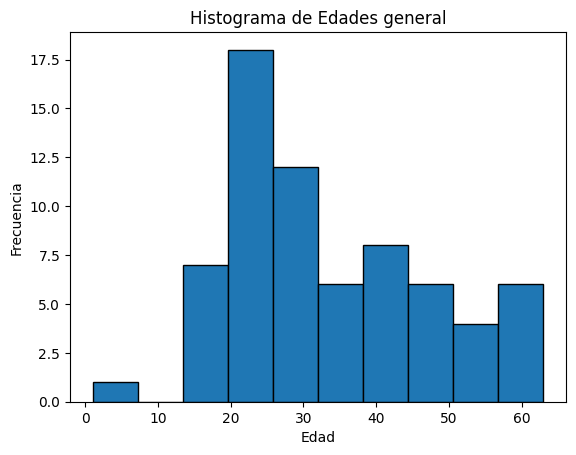

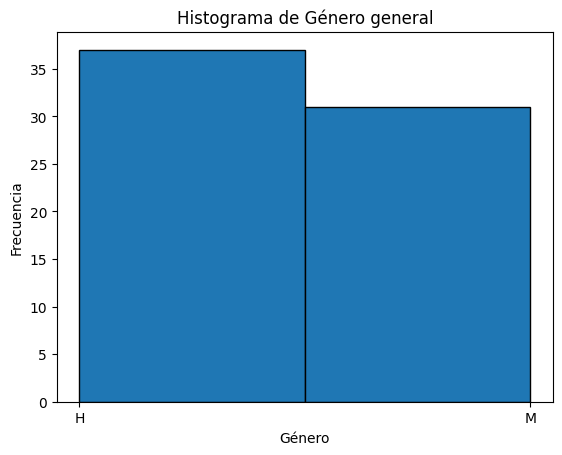

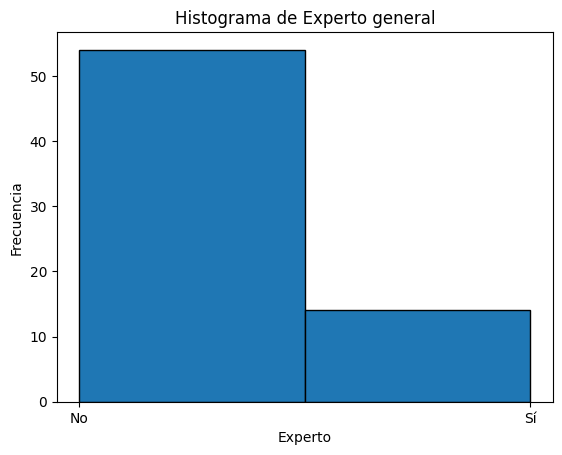

In [25]:
general_stats = {**stats_upv, **stats_ugr}

edades = [datos['edad'] for datos in general_stats.values()]
plt.hist(edades, bins=10, edgecolor='black')
plt.title('Histograma de Edades general')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


generos = [datos['genero'] for datos in general_stats.values()]
plt.hist(generos, bins=2, edgecolor='black')
plt.title('Histograma de Género general')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


expertos = np.array([datos['experto'] for datos in general_stats.values()], dtype=np.uint8)
plt.hist(expertos, bins=2, edgecolor='black')
plt.title('Histograma de Experto general')
plt.xlabel('Experto')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

In [26]:
from scipy import stats

# Obtener las edades de los voluntarios
edades = [datos['edad'] for datos in general_stats.values()]

# Calcular la media
media_edades = np.mean(edades)

# Calcular la moda
moda_edades = stats.mode(edades).mode[0]

# Calcular la desviación estándar
std_edades = np.std(edades)

# Realizar prueba de normalidad (Shapiro-Wilk test)
shapiro_edades, p_value_edades = stats.shapiro(edades)

print("Media de las edades:", media_edades)
print("Moda de las edades:", moda_edades)
print("Desviación estándar de las edades:", std_edades)
print("Resultado del test de normalidad (Shapiro-Wilk) para las edades:")
print("Estadístico de prueba:", shapiro_edades)
print("Valor p:", p_value_edades)
print()

# Obtener los valores de género de los voluntarios
generos = [0 if datos['genero'] == 'M' else 1 for datos in general_stats.values()]

# Calcular la proporción de géneros
prop_generos = np.mean(generos)

# Realizar prueba de normalidad (Chi-square test)
chi2_generos, p_value_generos = stats.normaltest(generos)

print("Proporción de géneros:", prop_generos)
print("Resultado del test de normalidad (Chi-square) para la variable género:")
print("Estadístico de prueba:", chi2_generos)
print("Valor p:", p_value_generos)
print()


# Obtener los valores de experto de los voluntarios
expertos = [datos['experto'] for datos in general_stats.values()]

# Calcular la proporción de expertos
prop_expertos = np.mean(expertos)

# Realizar prueba de normalidad (Chi-square test)
chi2_expertos, p_value_expertos = stats.normaltest(expertos)

print("Proporción de expertos:", prop_expertos)
print("Resultado del test de normalidad (Chi-square) para la variable experto:")
print("Estadístico de prueba:", chi2_expertos)
print("Valor p:", p_value_expertos)



# Posible agrupación de edades:

p33 = np.percentile(edades, 33)
p66 = np.percentile(edades, 66)

# Dividir las edades en tres grupos
grupo1 = [edad for edad in edades if edad <= p33]
grupo2 = [edad for edad in edades if p33 < edad <= p66]
grupo3 = [edad for edad in edades if edad > p66]
print()
print(f"Edades: {edades}")
print(f"Grupo 1 (Edad <= {p33}): {grupo1}")
print(f"Grupo 2 ({p33} < edad <= {p66}): {grupo2}")
print(f"Grupo 3 (Edad > {p66}): {grupo3}")


Media de las edades: 33.36764705882353
Moda de las edades: 21
Desviación estándar de las edades: 13.63915687812193
Resultado del test de normalidad (Shapiro-Wilk) para las edades:
Estadístico de prueba: 0.9301623106002808
Valor p: 0.000919748330488801

Proporción de géneros: 0.5441176470588235
Resultado del test de normalidad (Chi-square) para la variable género:
Estadístico de prueba: 822.5292396864179
Valor p: 2.454963277104944e-179

Proporción de expertos: 0.20588235294117646
Resultado del test de normalidad (Chi-square) para la variable experto:
Estadístico de prueba: 18.159551875964286
Valor p: 0.00011394713582189214

Edades: [31, 60, 49, 63, 35, 45, 57, 41, 57, 34, 51, 51, 21, 37, 57, 31, 38, 21, 41, 21, 22, 21, 27, 41, 18, 19, 19, 19, 20, 54, 20, 23, 24, 29, 43, 21, 29, 27, 19, 29, 40, 27, 43, 44, 47, 23, 32, 19, 50, 22, 49, 24, 21, 53, 37, 41, 22, 30, 23, 60, 22, 18, 28, 29, 26, 50, 1, 23]
Grupo 1 (Edad <= 23.0): [21, 21, 21, 22, 21, 18, 19, 19, 19, 20, 20, 23, 21, 19, 23, 19, 

/tmp/ipykernel_295/3246702423.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_edades = stats.mode(edades).mode[0]


In [27]:
import pickle

with open("general_stats_dict", 'wb') as archivo:
    pickle.dump(general_stats, archivo)